
# Project: Movies Data Analysis done by Edwin Kihara

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

Features:

* budget: The budget of the movie in dollars.
* genres: A stringified list of dictionaries that list out all the genres associated with the movie.
* homepage: The Official Homepage of the movie.
* id: The ID of the movie.
* imdb_id: The IMDB ID of the movie.
* original_title: The original title of the movie.
* overview: A brief description of the movie.
* popularity: The Popularity Score assigned by TMDB.
* homepage: The URL of the homepage.
* production_companies: A stringified list of production companies involved with the making of the movie.
* release_date: Theatrical Release Date of the movie.
* revenue: The total revenue of the movie in dollars.
* runtime: The runtime of the movie in minutes.
* tagline: The tagline of the movie.
* vote_average: The average rating of the movie.
* vote_count: The number of votes by users, as counted by TMDB.

 
#### About the Dataset

This data set contains information about movies collected from The Movie Database (TMDb), including user ratings and revenue. Data points include cast, crew, budget, revenue, release dates, vote_count, TMDB vote counts and vote averages. The primary goal of this Dataset is to find varaible insights of the most popular movies and as well depict a picture of movies that made the highest revenue. For this analysis we will visualize top 5 for each popular movie and top 5 of the movies that made the highest revenue


### Question(s) for Analysis

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 


#### Questions to be explored
> 1. Which are the top 5 popular movies?
> 2. Top 5 Movies with the highest revenue?

In [1]:
# Importing Packages to be used
import numpy as np
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from urllib.request import urlopen
%matplotlib inline


### Read in the Data

In [2]:
# Importing the required url from the internet to dataframe
movieData = pd.read_csv('tmdb-movies.csv')
movieData.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**

##### Let's first have a quick look of the dataset

In [3]:
# Calling the pandas shape attribute to get number of rows and columns
movieData.shape

(10866, 21)

> From can see that our dataset given a variable of movieData contains 10,866 Rows and 21 Columns

In [4]:
# Calling info() method to print information about the dataframe
movieData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> We can see the dataset contains different data types which are 11 columns that are of type object, 6 columns that are of type integer and 4 columns that are of type float

#### Having a look at the columns

In [5]:
# Calling columns attribute which return the column labels of the given Dataframe
movieData.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
# Calling The transpose() function is used to transpose index and columns.
movieData.head().transpose()

,0,1,2,3,4
id,135397,76341,262500,140607,168259
imdb_id,tt0369610,tt1392190,tt2908446,tt2488496,tt2820852
popularity,32.9858,28.4199,13.1125,11.1731,9.33501
budget,150000000,150000000,110000000,200000000,190000000
revenue,1513528810,378436354,295238201,2068178225,1506249360
original_title,Jurassic World,Mad Max: Fury Road,Insurgent,Star Wars: The Force Awakens,Furious 7
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Vin Diesel|Paul Walker|Jason Statham|Michelle ...
homepage,http://www.jurassicworld.com/,http://www.madmaxmovie.com/,http://www.thedivergentseries.movie/#insurgent,http://www.starwars.com/films/star-wars-episod...,http://www.furious7.com/
director,Colin Trevorrow,George Miller,Robert Schwentke,J.J. Abrams,James Wan
tagline,The park is open.,What a Lovely Day.,One Choice Can Destroy You,Every generation has a story.,Vengeance Hits Home


##### Checking for null values

In [7]:
# Checks for null values
movieData.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> From the Dataset we can observe that the nine (9) columns have null values. This are : -
    
* imdb_id Column: Has 10 null values a representation 0f 0.09% of the whole dataset
* cast Column: Has 76 null values a representation of 0.7% of the whole dataset
* homepage Column: Has 7,930 null values a representation of 72% of the whole dataset
* director Column: Has 44 null values a representation of 0.4% of the whole dataset
* tagline Column: Has  2824 null values a representation of 26% of the whole dataset
* keywords Column: Has  1493 null values a representation of 14% of the whole dataset
* overview Column: Has  4 null values a representation of 0.04% of the whole dataset
* genres Column: Has  23 null values a representation of 0.21% of the whole dataset
* production_companies Column: Has  1030 null values a representation of 9.5% of the whole dataset
    

In [8]:
# Checking the specific column for null values
movieData['homepage'].isnull().sum()

7930

> Since homepage column has 72% of null values we will drop the table as it won't be that significant for our data exploration

In [9]:
# Here the code will drop the homepage column hence total columns will add to 20 from 21
movieData.drop(['homepage'], axis = 1, inplace = True) 
movieData.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'tagline', 'keywords', 'overview', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Top 10 Popular Movies)

##### Undertaking a quick statistical analysis and representation of the Data

In [10]:
# Calling the describe function which returns the statistical summary of the dataframe or series
movieData.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


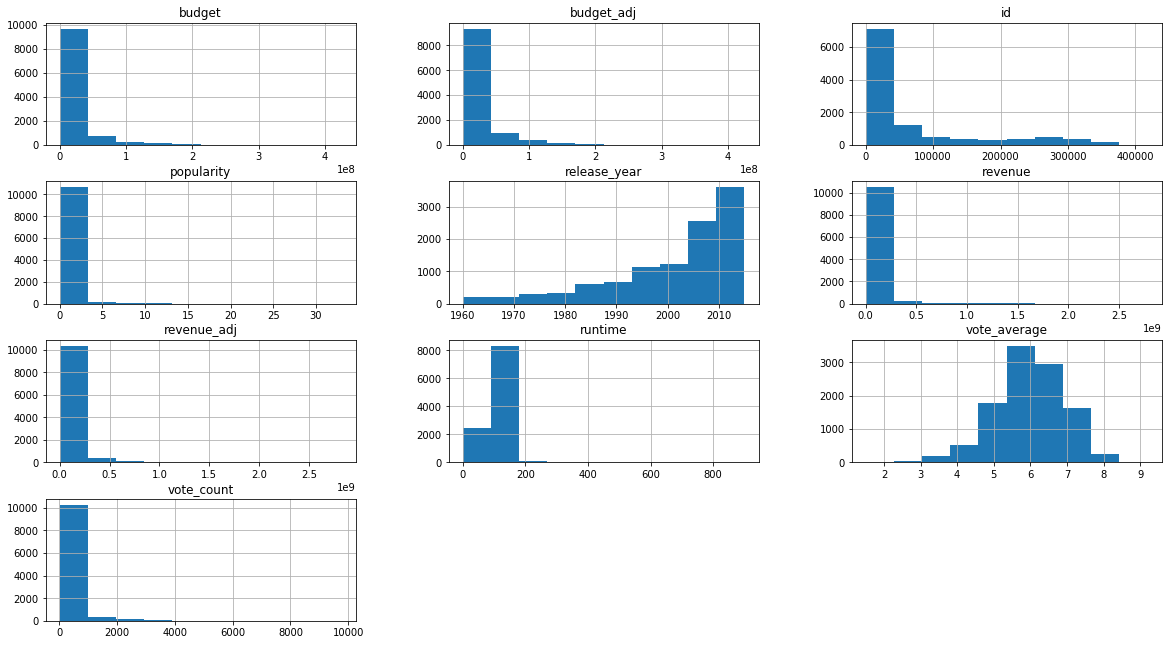

In [11]:
movieData.hist(figsize = (20,11));

In [12]:
mean_vote= movieData['vote_average'].mean()
mean_vote

5.9749217743419845

> So, the mean rating for all the movies is approx 5.The next step is to determine an appropriate value for minimum votes required to be listed. We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

In [13]:
minimumVotes_required = movieData['vote_count'].quantile(0.9)
minimumVotes_required

508.0

In [14]:
# Filtering out the movies that qualify for the chart

qualify_movies = movieData.copy().loc[movieData['vote_count'] >= minimumVotes_required]
qualify_movies.shape

(1088, 20)

> We see that there are 1088 movies which qualify to be in this list. Now, we need to calculate our metric for each qualified movie. To do this, we will define a function, weighted_rating() and define a new feature score, of which we'll calculate the value by applying this function to our DataFrame of qualified movies.

In [15]:
def weighted_rating(x, minimumVotes_required = minimumVotes_required, mean_vote = mean_vote):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+ minimumVotes_required) * R) + (minimumVotes_required/(minimumVotes_required+v) * mean_vote)

In [16]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
qualify_movies['score'] = qualify_movies.apply(weighted_rating, axis=1)

#### Sorting the DataFrame based on the score feature and output the title, release_year, vote count, vote average and weighted rating or score of the top 10 movies.

In [17]:
#Sort movies based on score calculated above
qualify_movies = qualify_movies.sort_values('score', ascending=False)

#Print the top 15 movies by score
qualify_movies[['original_title', 'release_year', 'vote_count', 'vote_average', 'score']].head(15)

,original_title,release_year,vote_count,vote_average,score
4178,The Shawshank Redemption,1994,5754,8.4,8.203267
7269,The Godfather,1972,3970,8.3,8.036235
2875,The Dark Knight,2008,8432,8.1,7.979246
2409,Fight Club,1999,5923,8.1,7.932135
4177,Pulp Fiction,1994,5343,8.1,7.915495
4179,Forrest Gump,1994,4856,8.1,7.898744
629,Interstellar,2014,6498,8.0,7.853163
650,Whiplash,2014,2372,8.2,7.807521
1919,Inception,2010,9767,7.9,7.804823
7309,The Empire Strikes Back,1980,3954,8.0,7.769444


In [18]:
movie_scoreData = qualify_movies[['original_title', 'release_year', 'vote_count', 'vote_average', 'score']].head(15)

In [19]:
movie_scoreData.head(2)

,original_title,release_year,vote_count,vote_average,score
4178,The Shawshank Redemption,1994,5754,8.4,8.203267
7269,The Godfather,1972,3970,8.3,8.036235


Text(0.5,1,'Top 10 Popular Movies')

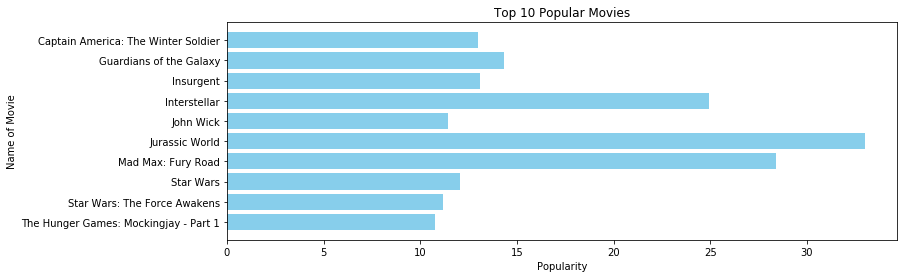

In [20]:
pop= movieData.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['original_title'].head(10),pop['popularity'].head(10), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.ylabel("Name of Movie")
plt.title("Top 10 Popular Movies")

Text(0.5,1,'Movie Score evolved over time')

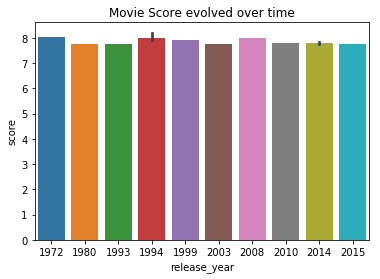

In [21]:
# Chart showing how Movie scores evolved over time 
sns.barplot(x=movie_scoreData['release_year'], y=movie_scoreData['score'])
plt.title("Movie Score evolved over time")

### Research Question 2 ( Categories of highest Revenue)

In [22]:
#Print the top 15 movies by revenue
qualify_movies[['original_title', 'revenue']].sort_values('revenue', ascending=False).head(15)

,original_title,revenue
1386,Avatar,2781505847
3,Star Wars: The Force Awakens,2068178225
5231,Titanic,1845034188
4361,The Avengers,1519557910
0,Jurassic World,1513528810
4,Furious 7,1506249360
14,Avengers: Age of Ultron,1405035767
3374,Harry Potter and the Deathly Hallows: Part 2,1327817822
5422,Frozen,1274219009
5425,Iron Man 3,1215439994


In [23]:
movieData['original_title'].value_counts()

Hamlet                                           4
Life                                             3
Julia                                            3
Carrie                                           3
The Three Musketeers                             3
Wuthering Heights                                3
A Christmas Carol                                3
Shelter                                          3
Alice in Wonderland                              3
Annie                                            3
Emma                                             3
Frankenstein                                     3
Hercules                                         3
Jane Eyre                                        3
Beauty and the Beast                             3
Oliver Twist                                     3
The Black Hole                                   3
Unknown                                          2
The Pink Panther                                 2
The Omen                       

Text(0.5,1,'Top 10 Revenue making Movies')

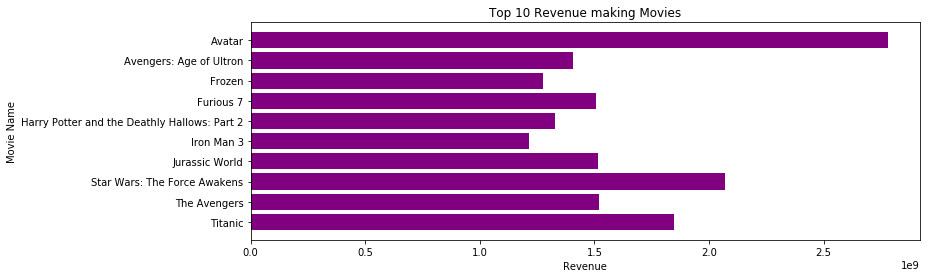

In [24]:
# Plotting Top 10 Revenue making Movies
pop= movieData.sort_values('revenue', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['original_title'].head(10),pop['revenue'].head(10), align='center',
        color='purple')
plt.gca().invert_yaxis()
plt.xlabel("Revenue")
plt.ylabel("Movie Name")
plt.title("Top 10 Revenue making Movies")

> Avatar, Star Wars and Titanic take the top three movies with the highest revenue

In [25]:
# applying groupby() function to
# group the data on production_companies value.
production_sort = movieData.groupby('production_companies')
  
# Let's print the first entries
# in all the groups formed.
production_sort.first()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
production_companies,,,,,,,,,,,,,,,,,,,
10th Hole Productions|Anonymous Content|Ambush Entertainment|Maven Pictures|Foggy Bottom Pictures,72890,tt1698648,0.221973,0,0,Girl Most Likely,Kristen Wiig|Annette Bening|Matt Dillon|Darren...,Shari Springer Berman|Robert Pulcini,She has a lot to live up to. And a few things ...,woman director,A failed New York playwright stages a suicide ...,103,Comedy,9/7/12,63,5.7,2012,0.000000e+00,0.000000e+00
10th Hole Productions|Benaroya Pictures|Four of a Kind Productions,41556,tt1403988,0.385851,4500000,123820,The Romantics,Katie Holmes|Anna Paquin|Josh Duhamel|Dianna A...,Galt Niederhoffer,NaN,cheating|wedding|romantic literature|woman dir...,Seven close friends reunite for the wedding of...,95,Comedy|Drama|Romance,9/10/10,46,4.8,2010,4.500000e+06,1.238200e+05
120dB Films|Louisiana Media Productions|Anchor Bay Films|Mimran Schur Pictures|Upload Films,199420,tt1741243,0.396210,5000000,0,Pawn Shop Chronicles,Elijah Wood|Norman Reedus|Brendan Fraser|Vince...,Wayne Kramer,One small town pawn shop. One big time wild ride.,NaN,A missing wedding ring leads to a wild-goose c...,112,Action|Comedy,7/12/13,47,5.6,2013,4.680167e+06,0.000000e+00
120dB Films|Pimienta|The Salt Company International|Private Island Trax|Stun Creative,205724,tt2193265,0.244507,3500000,0,Welcome to the Jungle,Kristen Schaal|Megan Boone|Jean-Claude Van Dam...,Rob Meltzer,Unleash your inner beast!,action,A company retreat on a tropical island goes te...,95,Comedy,4/27/13,81,4.9,2013,3.276117e+06,0.000000e+00
120dB Films|Scion Films|Voodoo Production Services|Chydzik Media Group|First Wedding Productions,59296,tt1436559,0.520430,1,1378,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,Here comes the ride.,wedding vows|marriage|love,A happy newlywed marriage counselor's views on...,90,Comedy|Romance,6/3/11,55,5.3,2011,9.693980e-01,1.335831e+03
1492 Pictures|Dune Entertainment|Fox 2000 Pictures|Sunswept Entertainment|Dune Entertainment III,76285,tt1854564,2.032753,90000000,174578751,Percy Jackson: Sea of Monsters,Logan Lerman|Alexandra Daddario|Douglas Smith|...,Thor Freudenthal,"Where There Are Gods, There Are Monsters.",hermes|poseidon|demigod|golden fleece|olympus,"In their quest to confront the ultimate evil, ...",106,Adventure|Family|Fantasy,8/7/13,1039,5.9,2013,8.424300e+07,1.634115e+08
1492 Pictures|Warner Bros.|Heyday Films,671,tt0241527,8.021423,125000000,976475550,Harry Potter and the Philosopher's Stone,Daniel Radcliffe|Rupert Grint|Emma Watson|John...,Chris Columbus,Let the Magic Begin.,witch|christmas party|magic|cutting the cord|h...,Harry Potter has lived under the stairs at his...,152,Adventure|Fantasy|Family,11/16/01,4265,7.2,2001,1.539360e+08,1.202518e+09
1492 Pictures|Warner Bros.|Heyday Films|MIRACLE Productions GmbH & Co. KG,672,tt0295297,6.012584,100000000,876688482,Harry Potter and the Chamber of Secrets,Daniel Radcliffe|Rupert Grint|Emma Watson|Kenn...,Chris Columbus,Hogwarts is back in session.,flying car|witch|magic language|car journey|cu...,"Ignoring threats to his life, Harry returns to...",161,Adventure|Fantasy|Family,11/13/02,3458,7.2,2002,1.212261e+08,1.062776e+09
1492 Pictures|Warner Bros.|Heyday Films|P of A Productions Limited,673,tt0304141,5.827781,130000000,789804554,Harry Potter and the Prisoner of Azkaban,Daniel Radcliffe|Rupert Grint|Emma Watson|Gary...,Alfonso CuarÃ³n,Something wicked this way comes.,flying|traitor|cutting the cord|child hero|broom,"Harry, Ron and Hermione return to Hogwarts for...",141,Adventure|Fantasy|Family,5/31/04,3550,7.4,2004,1.500779e+08,9.117862e+08


In [26]:
movieData['production_companies'].value_counts()

Paramount Pictures                                                                                                            156
Universal Pictures                                                                                                            133
Warner Bros.                                                                                                                   84
Walt Disney Pictures                                                                                                           76
Columbia Pictures                                                                                                              72
Metro-Goldwyn-Mayer (MGM)                                                                                                      72
New Line Cinema                                                                                                                61
Touchstone Pictures                                                                       

In [27]:
sales_reviewed = movieData.groupby(['production_companies', 'original_title']).revenue.agg([len])
sales_reviewed

,,len
production_companies,original_title,
10th Hole Productions|Anonymous Content|Ambush Entertainment|Maven Pictures|Foggy Bottom Pictures,Girl Most Likely,1
10th Hole Productions|Benaroya Pictures|Four of a Kind Productions,The Romantics,1
120dB Films|Louisiana Media Productions|Anchor Bay Films|Mimran Schur Pictures|Upload Films,Pawn Shop Chronicles,1
120dB Films|Pimienta|The Salt Company International|Private Island Trax|Stun Creative,Welcome to the Jungle,1
120dB Films|Scion Films|Voodoo Production Services|Chydzik Media Group|First Wedding Productions,"Love, Wedding, Marriage",1
1492 Pictures|Dune Entertainment|Fox 2000 Pictures|Sunswept Entertainment|Dune Entertainment III,Percy Jackson: Sea of Monsters,1
1492 Pictures|Warner Bros.|Heyday Films,Harry Potter and the Philosopher's Stone,1
1492 Pictures|Warner Bros.|Heyday Films|MIRACLE Productions GmbH & Co. KG,Harry Potter and the Chamber of Secrets,1
1492 Pictures|Warner Bros.|Heyday Films|P of A Productions Limited,Harry Potter and the Prisoner of Azkaban,1


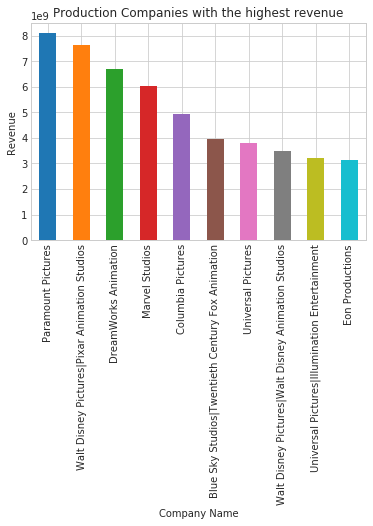

In [28]:
sns.set_style('whitegrid')
plt.title('Production Companies with the highest revenue')
movieData.groupby('production_companies')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Company Name')
plt.ylabel('Revenue')
plt.show()

> Paramount Pictures, Walt Disney Pictures and Dreamworks animation take the top three production companies with the highest revenue

Text(0.5,1,'Number of movies Released per year')

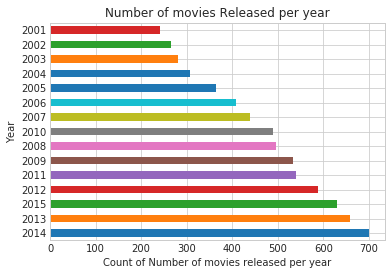

In [29]:
movieData['release_year'].value_counts()[:15].plot(label='Number of movies released per year',kind='barh')
plt.xlabel('Count of Number of movies released per year')
plt.ylabel('Year')
plt.title('Number of movies Released per year')

<a id='conclusions'></a>
## Conclusions


### Summary of findings and results performed

##### Our Research problem was to get to know the top five movies according to popularity and as well get to Visualize different categories with highest revenue. 
> The two categories that were identified for revenue were: -
* Production Companies with the highest revenue
* Movies by original title with the highest revenue

#### Conclusion on top five movies by popularity

Text(0.5,1,'Top 10 Popular Movies')

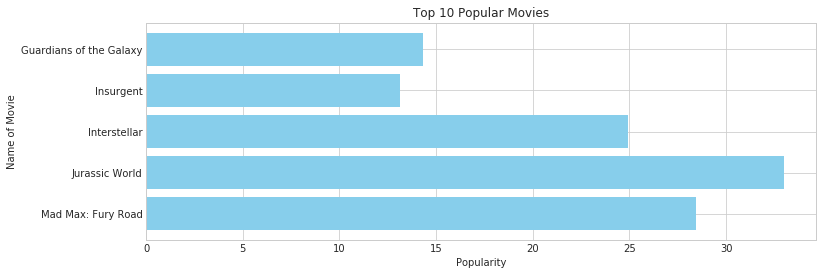

In [49]:
pop= movieData.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['original_title'].head(5),pop['popularity'].head(5), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.ylabel("Name of Movie")
plt.title("Top 10 Popular Movies")

### From the data we can observe that the top 5 most popular movies are :
> 1. Jurassic world
> 2. Mad Max: Fury Road
> 3. InterStellar
> 4. Guardian of the Galaxy
> 5. Insurgent


#### Conclusion on top five movies by revenue grouped by original_title

Text(0.5,1,'Top 10 Revenue making Movies')

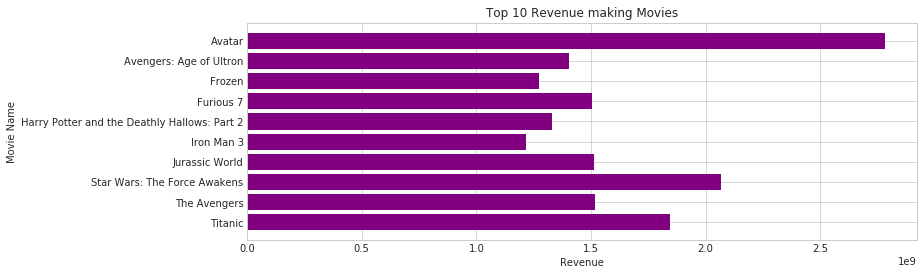

In [31]:
# Plotting Top 10 Revenue making Movies
pop= movieData.sort_values('revenue', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['original_title'].head(10),pop['revenue'].head(10), align='center',
        color='purple')
plt.gca().invert_yaxis()
plt.xlabel("Revenue")
plt.ylabel("Movie Name")
plt.title("Top 10 Revenue making Movies")

In [50]:
movieData.loc[movieData['original_title'] == 'Jurassic World']

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### From the data we can see that the top 5 movies that brought the highest revenue were :
> 1. Avatar
> 2. Star Wars: The force awakens
> 3. Titanic
> 4. The Avangers
> 5. Jurassic World

#### Conclusion on top five Production companies with the highest revenue

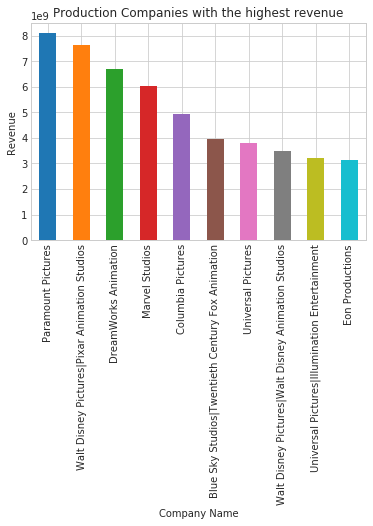

In [32]:
sns.set_style('whitegrid')
plt.title('Production Companies with the highest revenue')
movieData.groupby('production_companies')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Company Name')
plt.ylabel('Revenue')
plt.show()

### From the data we can see that the top 5 Production companies that brought the highest revenue were :
> 1. Paramount Pictures
> 2. Walt Disney Pictures
> 3. DreamWorks Animation
> 4. Marvel Studios
> 5. Columbia Pictures

#### Where can additional research be done or where additional information could be useful.

* More additional research could be done on the most successful Movie by Average Gross, this can be done by using the average gross per movie to gauge the success of a movie franchise.

* We could as well look into the longest running franchises which have stood the test of time and have managed to deliver the largest number of movies under a single banner.  What should be kept in mind however when working on this research is that, it does not imply that successful movie franchises tend to have more movies. Some franchises, such as Harry Potter, have a predefined storyline and it wouldn't make sense to produce more movies despite its enormous success.

#### Limitation to the exploration

> The greatest limitation to the exploration of this dataset majorly lies on inflation when dealing with metrics such as revenue, Gross sales and profits. Where you find that the dataset has not been adjusted for inflation. Therefore, the statistics of this metrics will tend to strongly favor movie franchises in the recent times.

#### Observations

> We can observe that of the top 5 popular movies, 4 are categorized under genres of Science Fiction, hence we can say that most people enjoy Science Fiction Kinda movies

> From the data exploration we can observe that Jurassic World tops both as a Popular movie and as well as a top movie that makes revenue at position 1 and position 5 respectively, this shows a positive correlation between the two.

> A positive correlation can as well be observed between the years and number of movies released, in that as we advance with each year the number of movies released increases as well with each year.